# Big Data Management Assignment 4: Feature Engineering
### Group Name: Avengers
### Group Members

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: | 
| Ismail Maeen Fateh Allah Yaqot Alawami   |  MCS221028    |   
|LWANGA AKSAM              |  MCS231016    | 
|BAKUNGA BRONSON             |   MCS232006   |  



In [526]:
# Setting up Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement
Given the large number of genres that exist, we seek to predict the genre of a track. We shall apply feature engineering to make the model better.

# Loading the data

In [527]:
# Importing the data sets
# Given the size of the data sets, loading locally was preferred over using Google Colab
bp_track = pd.read_csv("bp_track.csv", low_memory=False)
audio_features =  pd.read_csv("audio_features.csv")
bp_genre = pd.read_csv("bp_genre.csv")
bp_key = pd.read_csv("bp_key.csv")

In [474]:
# See the first few records in bp_track dataset
bp_track.head()

,track_id,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,duration_ms,isrc,key_id,label_id,release_id,updated_on,is_matched_spot
0,17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130,6:48,408830.0,DECY62300081,23.0,3222,4144460,2023-09-14 16:19:56,NaN
1,17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124,6:47,407439.0,GBCDK2303028,15.0,258,4091230,2023-09-14 16:19:56,NaN
2,17610338,Akawi,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/akawi/17610338,124,7:17,437066.0,GBCDK2303029,22.0,258,4091230,2023-09-14 16:19:56,NaN
3,17658499,Interplanetary Species,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/interplanetary-species/1765...,93,6:27,387096.0,DELK12300089,24.0,68438,4106998,2023-09-14 16:19:56,NaN
4,17658498,Echoing Planetary Motion,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/echoing-planetary-motion/17...,125,7:40,460800.0,DELK12300088,20.0,68438,4106998,2023-09-14 16:19:56,NaN


In [475]:
# See the first few records in audio_features dataset
audio_features.head()

,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,updated_on
0,AD4X65752184,0.906000,0.650,296733,0.350,0.775,3,0.1140,-11.777,1,0.0284,110,4,0.336,2023-08-24 09:27:00
1,AEA0D1991170,0.000950,0.621,191989,0.639,0.820,7,0.5060,-9.258,1,0.0775,140,4,0.346,2023-08-24 09:30:04
2,AEA0Q2004008,0.031200,0.692,282904,0.980,0.866,9,0.0969,-9.952,1,0.0881,140,4,0.225,2023-08-24 09:30:04
3,AEA0Q2004009,0.000558,0.516,197904,0.924,0.434,5,0.1530,-13.564,0,0.2200,148,4,0.204,2023-08-24 09:30:04
4,AEA0Q2004010,0.009380,0.587,199471,0.910,0.804,0,0.5630,-10.552,1,0.0596,136,4,0.321,2023-08-24 09:30:04


In [476]:
# See the first few records in bp_genre dataset
bp_genre.head()

,genre_id,genre_name,song_count,genre_url,updated_on
0,8,Hard Dance / Hardcore,178646,/genre/hard-dance-hardcore/8,2023-09-19 15:01:03
1,50,Nu Disco / Disco,157934,/genre/nu-disco-disco/50,2023-09-19 15:01:03
2,12,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
3,85,Bass / Club,20716,/genre/bass-club/85,2023-09-19 15:01:03
4,94,Electro (Classic / Detroit / Modern),19615,/genre/electro-classic-detroit-modern/94,2023-09-19 15:01:03


In [477]:
# See the first few records in bp_key dataset
bp_key.head()

,key_id,key_letter,key_name,camelot_num,camelot_letter,is_sharp,is_flat,chord_id,chord_name
0,22,D,D Major,10,B,f,f,2,Major
1,8,A,A Minor,8,A,f,f,1,Minor
2,19,F,F Major,7,B,f,f,2,Major
3,24,E,E Major,12,B,f,f,2,Major
4,9,E,E Minor,9,A,f,f,1,Minor


# Let us get the bacic information about our datasets

In [478]:
print(f"Bp_track has {bp_track.shape[1]} columns and {bp_track.shape[0]} rows")

Bp_track has 17 columns and 10685331 rows


In [479]:
print(f"Audio_features has {audio_features.shape[1]} columns and {audio_features.shape[0]} rows")

Audio_features has 15 columns and 4687104 rows


In [480]:
print(f"Bp_genre has {bp_genre.shape[1]} columns and {bp_genre.shape[0]} rows")

Bp_genre has 5 columns and 32 rows


In [481]:
print(f"Bp_key has {bp_key.shape[1]} columns and {bp_key.shape[0]} rows")

Bp_key has 9 columns and 34 rows


In [482]:
bp_track.info()
bp_track.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685331 entries, 0 to 10685330
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         int64  
 1   title            object 
 2   mix              object 
 3   is_remixed       object 
 4   release_date     object 
 5   genre_id         int64  
 6   subgenre_id      float64
 7   track_url        object 
 8   bpm              int64  
 9   duration         object 
 10  duration_ms      float64
 11  isrc             object 
 12  key_id           float64
 13  label_id         int64  
 14  release_id       int64  
 15  updated_on       object 
 16  is_matched_spot  object 
dtypes: float64(3), int64(5), object(9)
memory usage: 1.4+ GB


Index(['track_id', 'title', 'mix', 'is_remixed', 'release_date', 'genre_id',
       'subgenre_id', 'track_url', 'bpm', 'duration', 'duration_ms', 'isrc',
       'key_id', 'label_id', 'release_id', 'updated_on', 'is_matched_spot'],
      dtype='object')

In [483]:
audio_features.info()
audio_features.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687104 entries, 0 to 4687103
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   isrc              object 
 1   acousticness      float64
 2   danceability      float64
 3   duration_ms       int64  
 4   energy            float64
 5   instrumentalness  float64
 6   key               int64  
 7   liveness          float64
 8   loudness          float64
 9   mode              int64  
 10  speechiness       float64
 11  tempo             int64  
 12  time_signature    int64  
 13  valence           float64
 14  updated_on        object 
dtypes: float64(8), int64(5), object(2)
memory usage: 536.4+ MB


Index(['isrc', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'updated_on'],
      dtype='object')

In [484]:
bp_genre.info()
bp_genre.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre_id    32 non-null     int64 
 1   genre_name  32 non-null     object
 2   song_count  32 non-null     int64 
 3   genre_url   32 non-null     object
 4   updated_on  32 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


Index(['genre_id', 'genre_name', 'song_count', 'genre_url', 'updated_on'], dtype='object')

In [485]:
bp_key.info()
bp_key.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   key_id          34 non-null     int64 
 1   key_letter      34 non-null     object
 2   key_name        34 non-null     object
 3   camelot_num     34 non-null     int64 
 4   camelot_letter  34 non-null     object
 5   is_sharp        34 non-null     object
 6   is_flat         34 non-null     object
 7   chord_id        34 non-null     int64 
 8   chord_name      34 non-null     object
dtypes: int64(3), object(6)
memory usage: 2.5+ KB


Index(['key_id', 'key_letter', 'key_name', 'camelot_num', 'camelot_letter',
       'is_sharp', 'is_flat', 'chord_id', 'chord_name'],
      dtype='object')

## Observation:
1. There are a lot of columns that are not relevant to what we want to do

In [486]:
# Drop unnecessary columns to save on space
bp_track.drop(['title', 'track_url', 'is_remixed', 'release_date', 'label_id', 'release_id', 'updated_on'], axis=1, inplace=True)
audio_features.drop(['updated_on'], axis=1, inplace=True)
bp_genre.drop(['genre_url', 'updated_on'], axis=1, inplace=True)

In [487]:
# Exploring the data more
print("Bp_track Summary")
bp_track.describe()

Bp_track Summary


,track_id,genre_id,subgenre_id,bpm,duration_ms,key_id
count,1.068533e+07,1.068533e+07,715425.000000,1.068533e+07,1.068270e+07,1.067908e+07
mean,1.012787e+07,2.124393e+01,213.801935,1.207246e+02,3.445434e+05,1.321047e+01
std,5.188218e+06,2.791291e+01,63.433043,1.912638e+01,2.021613e+05,8.739974e+00
min,4.971000e+03,1.000000e+00,5.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.745950e+06,5.000000e+00,210.000000,1.200000e+02,2.505030e+05,6.000000e+00
50%,1.063708e+07,1.100000e+01,246.000000,1.250000e+02,3.480290e+05,9.000000e+00
75%,1.472322e+07,1.500000e+01,246.000000,1.280000e+02,4.147200e+05,2.000000e+01
max,1.815576e+07,9.900000e+01,268.000000,2.580000e+02,2.300677e+07,3.400000e+01


## Observations:
1. The minimum bpm is 0 which is not the case for songs in the real world. They range from 90 bpm for slow songs to 250 bpm for songs in certain genres like hardstyle.
2. The minumum duration is 0 ms which is wrong as well. Songs usually vary between 1 min 30 seconds (90,000 milliseconds) to 15 mins (900,000 milliseconds).

In [488]:
# Handling bpm
bp_track = bp_track[bp_track["bpm"] > 90]

# Handling duration
bp_track = bp_track[bp_track["duration_ms"] > 90_000]
bp_track.drop(["duration"], axis=1, inplace=True)
bp_track.describe()

,track_id,genre_id,subgenre_id,bpm,duration_ms,key_id
count,9.548691e+06,9.548691e+06,646064.000000,9.548691e+06,9.548691e+06,9.545623e+06
mean,1.008739e+07,2.182020e+01,219.926837,1.253646e+02,3.525895e+05,1.320706e+01
std,5.168227e+06,2.830215e+01,56.084256,1.257384e+01,2.005544e+05,8.736682e+00
min,4.971000e+03,1.000000e+00,5.000000,9.100000e+01,9.000100e+04,1.000000e+00
25%,5.722468e+06,6.000000e+00,233.000000,1.220000e+02,2.601670e+05,6.000000e+00
50%,1.059378e+07,1.100000e+01,246.000000,1.250000e+02,3.580920e+05,9.000000e+00
75%,1.462315e+07,1.500000e+01,246.000000,1.280000e+02,4.200000e+05,2.000000e+01
max,1.815576e+07,9.900000e+01,268.000000,2.580000e+02,2.300677e+07,3.400000e+01


In [489]:
print("Audio_features Summary")
audio_features.describe()

Audio_features Summary


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06,4.687104e+06
mean,1.115222e-01,6.762825e-01,3.395846e+05,7.149000e-01,6.336123e-01,5.556958e+00,1.746018e-01,-9.215520e+00,5.422555e-01,8.774978e-02,1.268136e+02,3.959320e+00,3.957805e-01
std,2.241004e-01,1.573557e-01,1.909052e+05,2.097366e-01,3.432355e-01,3.690800e+00,1.629871e-01,4.168868e+00,4.982113e-01,8.655872e-02,2.113567e+01,3.182083e-01,2.555503e-01
min,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.820000e-04,5.980000e-01,2.453330e+05,5.840000e-01,3.840000e-01,2.000000e+00,8.390000e-02,-1.105900e+01,0.000000e+00,4.440000e-02,1.200000e+02,4.000000e+00,1.760000e-01
50%,9.170000e-03,7.130000e-01,3.411600e+05,7.500000e-01,8.180000e-01,6.000000e+00,1.100000e-01,-8.640000e+00,1.000000e+00,5.810000e-02,1.260000e+02,4.000000e+00,3.660000e-01
75%,8.500000e-02,7.970000e-01,4.135420e+05,8.860000e-01,8.890000e-01,9.000000e+00,1.910000e-01,-6.590000e+00,1.000000e+00,8.770000e-02,1.330000e+02,4.000000e+00,5.860000e-01
max,9.960000e-01,1.000000e+00,6.074945e+06,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,5.485000e+00,1.000000e+00,9.690000e-01,2.500000e+02,5.000000e+00,1.000000e+00


In [490]:
print("Bp_genre Summary")
bp_genre.describe()

Bp_genre Summary


,genre_id,song_count
count,32.000000,3.200000e+01
mean,49.187500,3.373100e+05
std,39.898611,3.897780e+05
min,1.000000,1.912000e+03
25%,10.500000,6.523575e+04
50%,38.500000,1.808405e+05
75%,91.250000,4.838102e+05
max,99.000000,1.375001e+06


In [491]:
print("Bp_key Summary")
bp_key.describe()

Bp_key Summary


,key_id,camelot_num,chord_id
count,34.000000,34.000000,34.000000
mean,17.500000,6.029412,1.500000
std,9.958246,3.622198,0.507519
min,1.000000,1.000000,1.000000
25%,9.250000,3.000000,1.000000
50%,17.500000,5.500000,1.500000
75%,25.750000,9.000000,2.000000
max,34.000000,12.000000,2.000000


In [492]:
# Checking for null values
bp_track.isnull().sum()

track_id                 0
mix                      4
genre_id                 0
subgenre_id        8902627
bpm                      0
duration_ms              0
isrc                276467
key_id                3068
is_matched_spot    3343928
dtype: int64

## Observations:
1. Subgenre_id, is_matched_spot has too many missing values.
2. Is_matched_spot is not relevant to our case since we shall not be making a comparison with data from Spotify.

In [493]:
# Droping subgenre_id and is_matched_spot
bp_track.drop(['subgenre_id', 'is_matched_spot'], axis=1, inplace=True)

# Droping rows with missing values for isrc, durarion, durarion_ms, mix and key_id
bp_track.dropna(inplace=True)

# Checking for null values
bp_track.isnull().sum()

track_id       0
mix            0
genre_id       0
bpm            0
duration_ms    0
isrc           0
key_id         0
dtype: int64

In [494]:
audio_features.isnull().sum()

isrc                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [495]:
bp_genre.isnull().sum()

genre_id      0
genre_name    0
song_count    0
dtype: int64

In [496]:
bp_key.isnull().sum()

key_id            0
key_letter        0
key_name          0
camelot_num       0
camelot_letter    0
is_sharp          0
is_flat           0
chord_id          0
chord_name        0
dtype: int64

## Observations:
1. The rest of the datasets do not have missing values.


In [497]:
# Checking for duplicates in bp_track
bp_track.duplicated().sum()

0

In [498]:
# Checking for duplicates in audio_features
audio_features.duplicated().sum()

0

In [499]:
# Checking for duplicates in bp_genre
bp_genre.duplicated().sum()

0

In [500]:
# Checking for duplicates in bp_key
bp_key.duplicated().sum()

0

# Final Outcome After Cleaning

In [501]:
bp_track.head()

,track_id,mix,genre_id,bpm,duration_ms,isrc,key_id
0,17775434,Original Mix,99,130,408830.0,DECY62300081,23.0
1,17610335,Original Mix,99,124,407439.0,GBCDK2303028,15.0
2,17610338,Original Mix,99,124,437066.0,GBCDK2303029,22.0
3,17658499,Original Mix,99,93,387096.0,DELK12300089,24.0
4,17658498,Original Mix,99,125,460800.0,DELK12300088,20.0


In [502]:
audio_features.head()

,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,AD4X65752184,0.906000,0.650,296733,0.350,0.775,3,0.1140,-11.777,1,0.0284,110,4,0.336
1,AEA0D1991170,0.000950,0.621,191989,0.639,0.820,7,0.5060,-9.258,1,0.0775,140,4,0.346
2,AEA0Q2004008,0.031200,0.692,282904,0.980,0.866,9,0.0969,-9.952,1,0.0881,140,4,0.225
3,AEA0Q2004009,0.000558,0.516,197904,0.924,0.434,5,0.1530,-13.564,0,0.2200,148,4,0.204
4,AEA0Q2004010,0.009380,0.587,199471,0.910,0.804,0,0.5630,-10.552,1,0.0596,136,4,0.321


In [503]:
bp_genre.head()

,genre_id,genre_name,song_count
0,8,Hard Dance / Hardcore,178646
1,50,Nu Disco / Disco,157934
2,12,Deep House,897280
3,85,Bass / Club,20716
4,94,Electro (Classic / Detroit / Modern),19615


In [504]:
bp_key.head()

,key_id,key_letter,key_name,camelot_num,camelot_letter,is_sharp,is_flat,chord_id,chord_name
0,22,D,D Major,10,B,f,f,2,Major
1,8,A,A Minor,8,A,f,f,1,Minor
2,19,F,F Major,7,B,f,f,2,Major
3,24,E,E Major,12,B,f,f,2,Major
4,9,E,E Minor,9,A,f,f,1,Minor


# Combining the datasets

In [505]:
# Merge bp_track with bp_genre on genre_id
merged_df = pd.merge(bp_track, bp_genre[["genre_id", "genre_name"]], on='genre_id', how='left')

# Merge the resulting df with audio_features on isrc
merged_df = pd.merge(merged_df, audio_features, on='isrc', how='inner')

# Merge the resulting df with bp_key on key_id
merged_df = pd.merge(merged_df, bp_key, on='key_id', how='left')

# The resulting merged_df is now a combination of all the datasets based on the common keys
merged_df.head()

merged_df.drop(["track_id", "mix", "isrc", "key_id", "time_signature", "key_name", "camelot_num", "camelot_letter", "is_flat", "chord_id", "genre_id", "duration_ms_x"], axis=1, inplace=True)

In [506]:
# Checking for null
merged_df.isnull().sum()

bpm                 0
genre_name          0
acousticness        0
danceability        0
duration_ms_y       0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
key_letter          0
is_sharp            0
chord_name          0
dtype: int64

In [507]:
pd.set_option('display.max_columns', None) 
merged_df.head()

,bpm,genre_name,acousticness,danceability,duration_ms_y,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,key_letter,is_sharp,chord_name
0,112,Amapiano,0.24700,0.732,411480,0.492,0.000,11,0.2970,-10.961,0,0.2620,112,0.367,A,f,Minor
1,105,140 / Deep Dubstep / Grime,0.06290,0.633,258526,0.771,0.864,8,0.0884,-6.420,1,0.0379,140,0.058,A,f,Major
2,140,140 / Deep Dubstep / Grime,0.00751,0.688,220286,0.566,0.654,1,0.3370,-12.319,0,0.0608,140,0.142,G,f,Major
3,130,UK Garage / Bassline,0.00220,0.840,182769,0.679,0.869,11,0.0490,-7.046,0,0.0592,130,0.520,G,f,Minor
4,130,UK Garage / Bassline,0.00220,0.840,182769,0.679,0.869,11,0.0490,-7.046,0,0.0592,130,0.520,B,f,Major


## Observations:
1. The genre name has a lot of alternatives. We need to get just one.

In [508]:
# Simplify the genre_name by taking the first genre listed
merged_df['genre_name'] = merged_df['genre_name'].apply(lambda x: x.split(' / ')[0])

# Ensure binary columns are encoded as integers
merged_df['mode'] = merged_df['mode'].astype(int)
merged_df['is_sharp'] = merged_df['is_sharp'].apply(lambda x: 1 if x == 't' else 0)
merged_df['chord_name'] = merged_df['chord_name'].apply(lambda x: 1 if x == 'Minor' else 0)

# Check the result
merged_df['genre_name'].head()


0     Amapiano
1          140
2          140
3    UK Garage
4    UK Garage
Name: genre_name, dtype: object

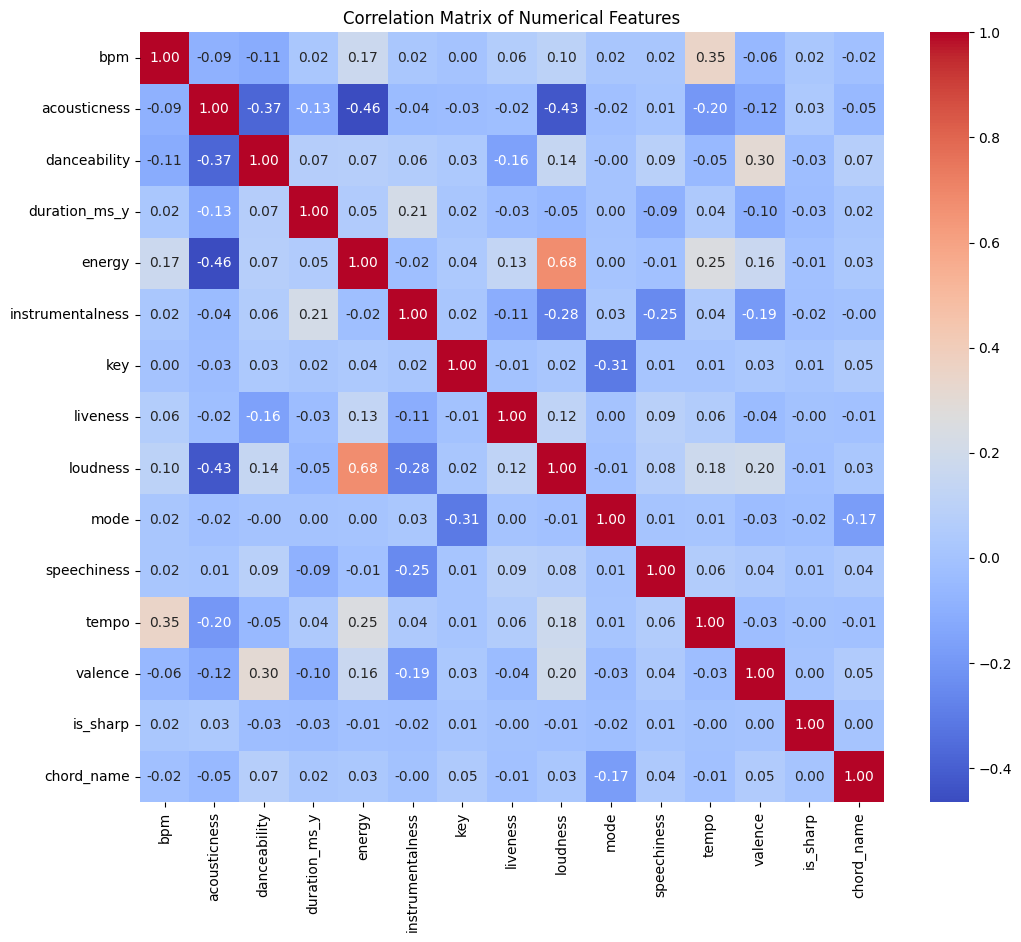

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix calculation
numeric_df = merged_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



## Observations:
1. From the correlation heatmap, we can observe that there are some variables that have high correlation with each other. For instance, duration_ms_x and duration_ms_y are highly correlated, which makes sense as they are likely representing the same feature measured in milliseconds. This redundancy can be resolved by dropping one of the columns.

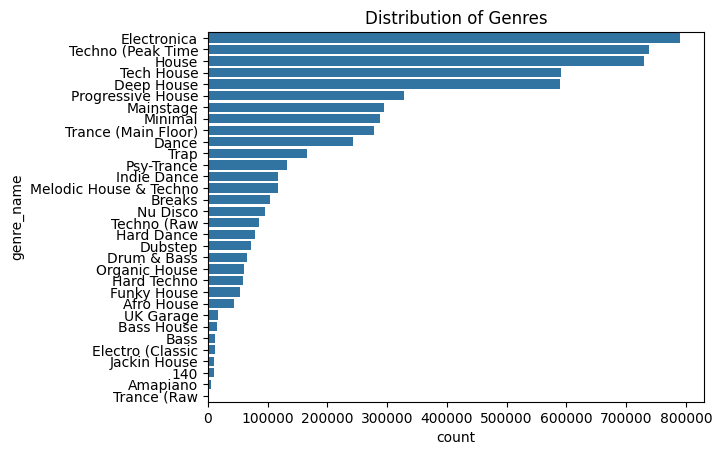

In [510]:
sns.countplot(y='genre_name', data=merged_df, order = merged_df['genre_name'].value_counts().index)
plt.title('Distribution of Genres')
plt.show()


## Observations
1. Some genres are more prevalent than others with Electronica having the highest number of songs and Trance having the least.

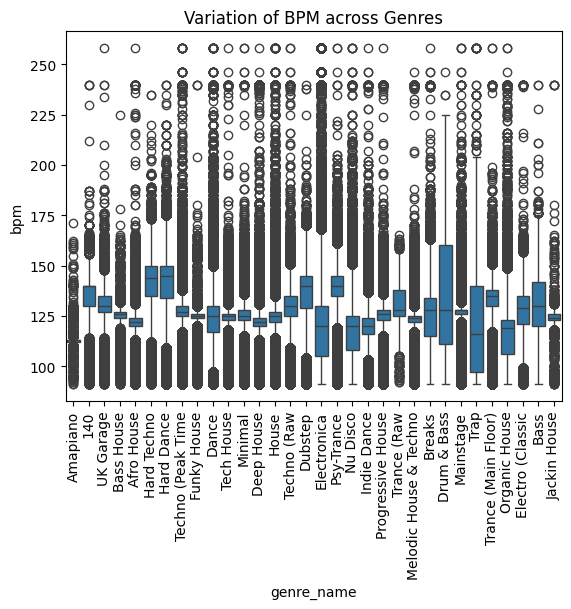

In [511]:
sns.boxplot(x='genre_name', y='bpm', data=merged_df)
plt.xticks(rotation=90)
plt.title('Variation of BPM across Genres')
plt.show()


## Observations:
1. There is variation across differet genres, this feature might be useful.

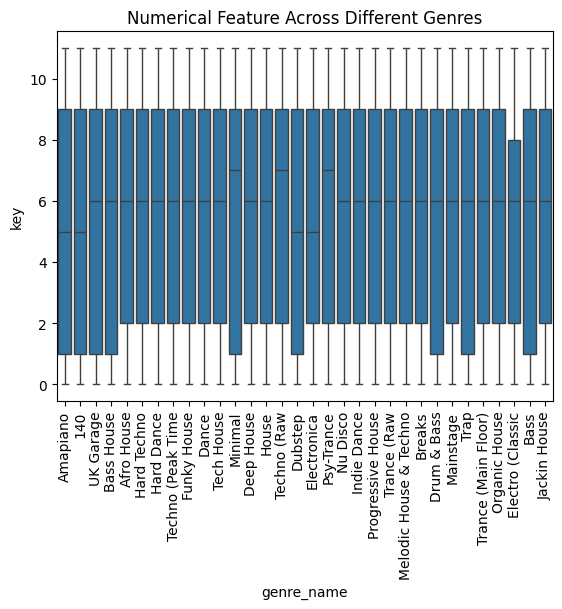

In [512]:
sns.boxplot(x='genre_name', y='key', data=merged_df)
plt.xticks(rotation=90)
plt.title('Numerical Feature Across Different Genres')
plt.show()


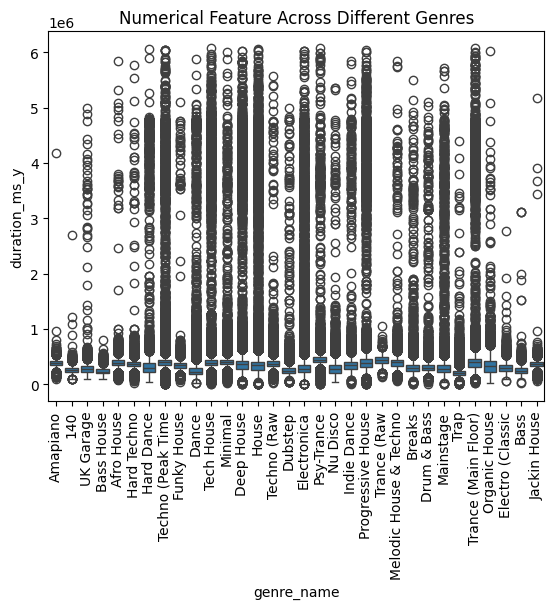

In [513]:
sns.boxplot(x='genre_name', y='duration_ms_y', data=merged_df)
plt.xticks(rotation=90)
plt.title('Numerical Feature Across Different Genres')
plt.show()


# Encoding 

In [514]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'genre_name'
label_encoder = LabelEncoder()
merged_df['genre_encoded'] = label_encoder.fit_transform(merged_df['genre_name'])

merged_df.head()

,bpm,genre_name,acousticness,danceability,duration_ms_y,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,key_letter,is_sharp,chord_name,genre_encoded
0,112,Amapiano,0.24700,0.732,411480,0.492,0.000,11,0.2970,-10.961,0,0.2620,112,0.367,A,0,1,2
1,105,140,0.06290,0.633,258526,0.771,0.864,8,0.0884,-6.420,1,0.0379,140,0.058,A,0,0,0
2,140,140,0.00751,0.688,220286,0.566,0.654,1,0.3370,-12.319,0,0.0608,140,0.142,G,0,0,0
3,130,UK Garage,0.00220,0.840,182769,0.679,0.869,11,0.0490,-7.046,0,0.0592,130,0.520,G,0,1,31
4,130,UK Garage,0.00220,0.840,182769,0.679,0.869,11,0.0490,-7.046,0,0.0592,130,0.520,B,0,0,31


In [515]:
!pip install xgboost

In [516]:
# Helper functions from Kaggle

from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [517]:
features = ["bpm", "key", "duration_ms_y", "energy", "loudness", "acousticness", "tempo"]

X = merged_df.copy()
y = X.pop('genre_encoded')
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_scaled, loadings = apply_pca(X)
print(loadings)

                    PC1       PC2       PC3       PC4       PC5       PC6  \
bpm           -0.249558  0.691045 -0.107060 -0.078148  0.604841 -0.273077   
key           -0.041905 -0.051522  0.423819 -0.903133  0.003631  0.010632   
duration_ms_y -0.068947  0.113353  0.855939  0.403253  0.145914  0.238409   
energy        -0.564083 -0.199962 -0.052744  0.005901  0.175221  0.292221   
loudness      -0.529400 -0.308888 -0.180984 -0.027978  0.184587  0.306891   
acousticness   0.467865  0.204287 -0.196054 -0.115460  0.266400  0.784816   
tempo         -0.337431  0.574303 -0.048065 -0.038503 -0.690738  0.270123   

                    PC7  
bpm           -0.046958  
key           -0.013829  
duration_ms_y -0.094997  
energy         0.723127  
loudness      -0.680096  
acousticness   0.026394  
tempo         -0.049385  


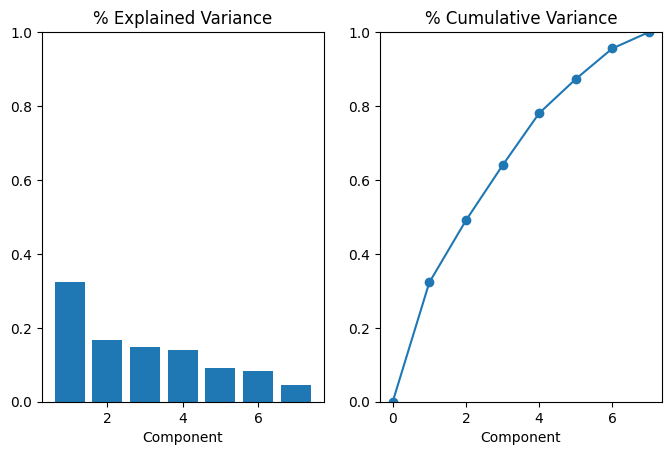

In [518]:
# Look at explained variance
plot_variance(pca);

## Observations:
1. All the features idenfied appear to be relevant to the genre_name.

In [519]:
mi_scores = make_mi_scores(X_scaled, y, discrete_features=False)
mi_scores

PC2    0.860482
PC1    0.840732
PC3    0.780016
PC5    0.774730
PC6    0.748189
PC7    0.726868
PC4    0.719598
Name: MI Scores, dtype: float64

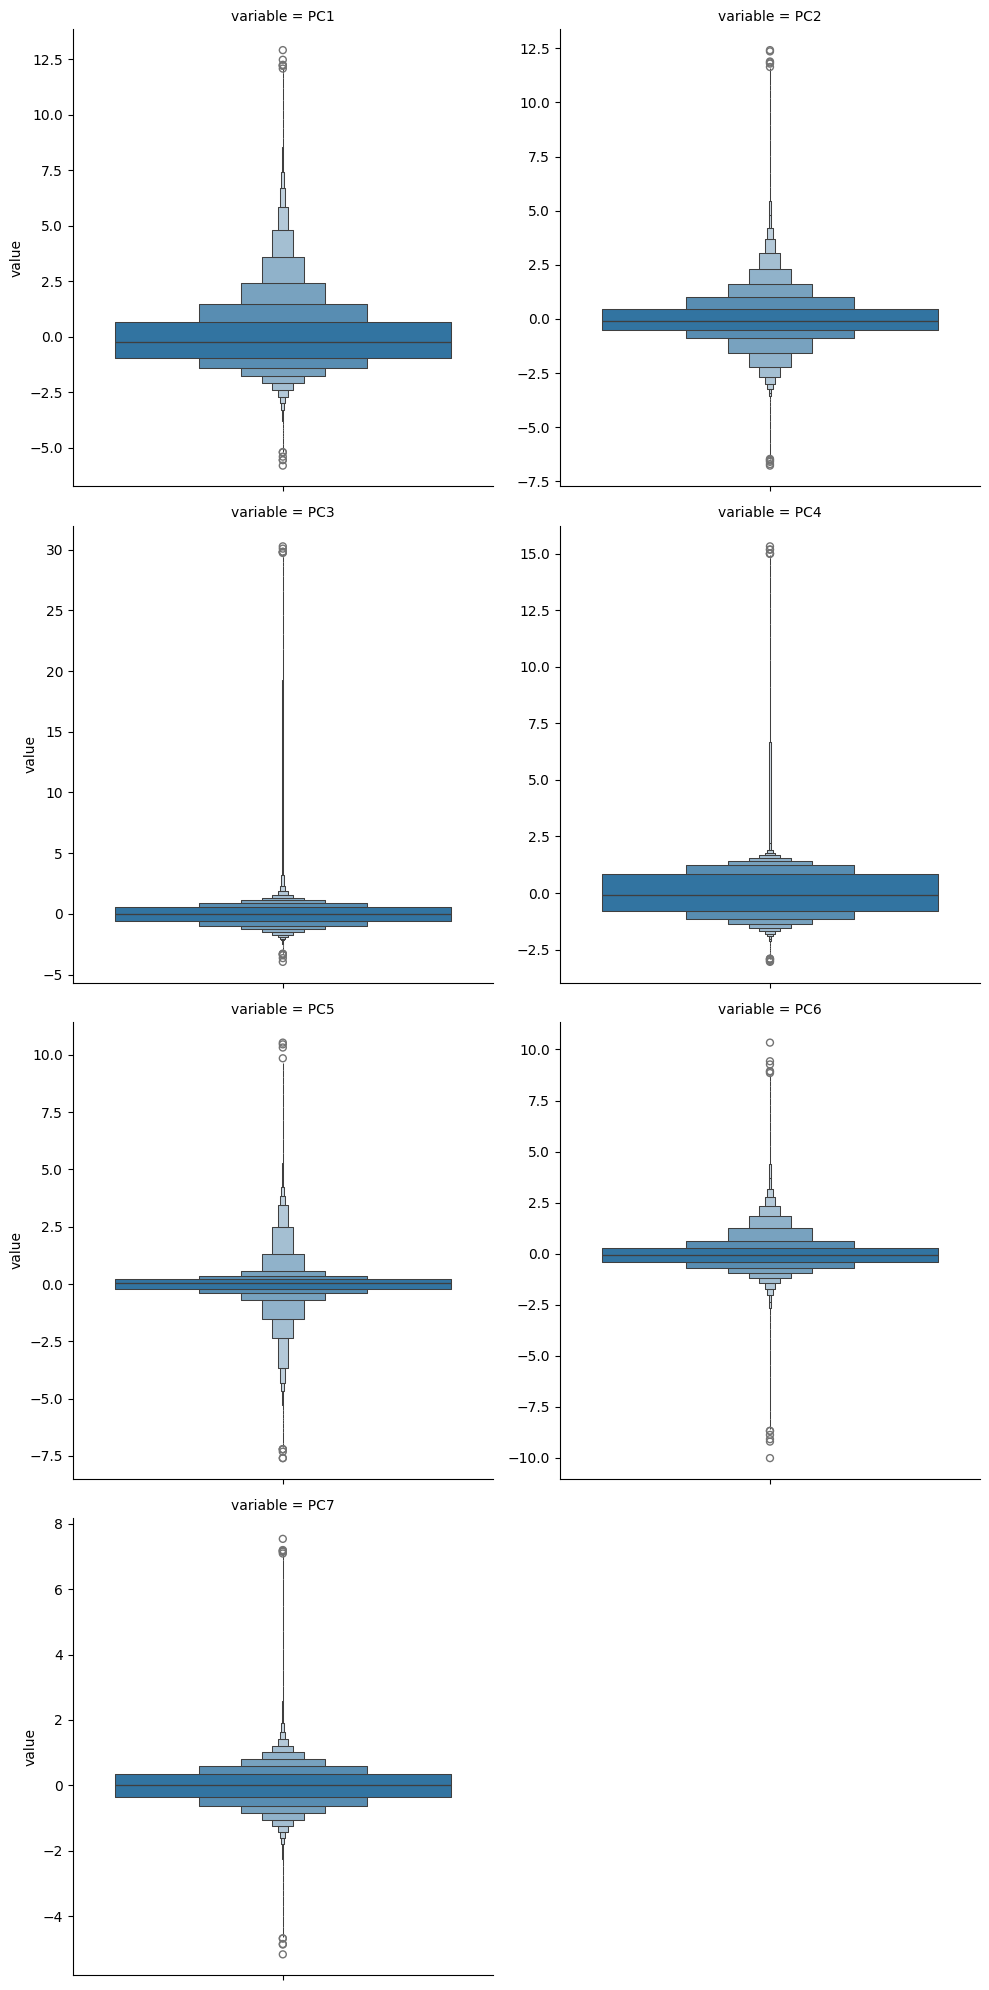

In [520]:
sns.catplot(
    y="value",
    col="variable",
    data=X_scaled.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

## Observations:
1. There are a few outliers in the values. These were noticed in the data but it would be normal in our case since some songs have really high BPM or are very long. This adds richness to the data.

# Calculating the baseline RMSLE

In [521]:
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.47762 RMSLE


# Feature creation

## Based on domain knowledge

In [522]:
# Feature representing the 'beat' using tempo and key for rhythmic and harmonic content
merged_df['beat_feature'] = merged_df['bpm'] * merged_df['key']

# Feature representing 'dynamics' from the energy and loudness for the dynamic range of a track
merged_df['dynamics_feature'] = merged_df['energy'] * merged_df['loudness']

# Harmonic complexity can be represented by the variance across the key (pitch) and valence (positivity of the track)
merged_df['harmony_feature'] = merged_df['key'] * merged_df['valence']

In [523]:
features = ["bpm", "key", "duration_ms_y", "energy", "loudness", "acousticness", "tempo", "beat_feature", "dynamics_feature", "harmony_feature"]

X = merged_df.copy()
y = X.pop('genre_encoded')
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_scaled, loadings = apply_pca(X)
print(loadings)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
bpm              -0.125149 -0.212439  0.185726  0.682018  0.049200  0.604124   
key              -0.529754  0.302162  0.011796 -0.001921  0.039888 -0.036074   
duration_ms_y    -0.025065 -0.060252  0.421995 -0.198025  0.858157  0.029081   
energy           -0.257491 -0.500090  0.074769 -0.226878 -0.223442  0.214760   
loudness         -0.233716 -0.480856 -0.435169 -0.113395  0.107591  0.074610   
acousticness      0.211488  0.415534 -0.119942  0.299381 -0.013580  0.128106   
tempo            -0.139153 -0.307010  0.218995  0.513733 -0.024372 -0.741634   
beat_feature     -0.541379  0.265186  0.040623  0.102342  0.047312  0.056030   
dynamics_feature  0.010975 -0.019788 -0.721087  0.231481  0.434783 -0.085841   
harmony_feature  -0.474176  0.202449 -0.091447 -0.117023 -0.077464 -0.065254   

                       PC7       PC8       PC9      PC10  
bpm              -0.184820  0.159500 -0.035667 -0.106340  
k

In [524]:
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.47414 RMSLE


## Observations:
1. We have managed to lower the RMSLE with the new features added